<a href="https://colab.research.google.com/github/sammyon7/50_Calculating_the_Winner/blob/master/BuildSimple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Generate and plot half moon dataset

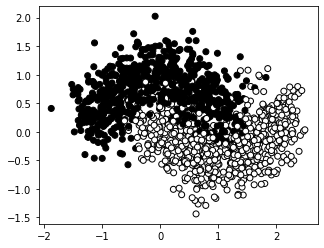

In [17]:
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples,
                                      noise=.3, random_state=1)

X = noisy_moons[0]

Y = noisy_moons[1].reshape(n_samples,1)

plt.scatter(X[:, 0], X[:, 1], c=Y[:,0], 
           edgecolors='k');

* Sigmoid
* Plot Decision Boundary








In [20]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=Y[:,0], cmap=plt.cm.Spectral, edgecolors='black')

<b>Initialize your parameter!</b>

In [21]:
hidden_layer_sizes = [8, 5, 3]
inp_size = X.shape[1]
out_size = Y.shape[1]
n_layers = len(hidden_layer_sizes)+1

In [25]:
def initialize_parameters(inp_size, hidden_layer_sizes, out_size):
    np.random.seed(2)
    sizes = [inp_size]+hidden_layer_sizes+[out_size]
    parameters = {}
    for l,s in enumerate(sizes[:-1]):
        parameters['w'+str(l+1)] = np.random.randn(sizes[l],sizes[l+1])*np.sqrt(1/sizes[l])
        parameters['b'+str(l+1)] = np.zeros((1,sizes[l+1]))
    return parameters

In [28]:
p = initialize_parameters(inp_size, hidden_layer_sizes, out_size)
p

{'b1': array([[0., 0., 0., 0., 0., 0., 0., 0.]]),
 'b2': array([[0., 0., 0., 0., 0.]]),
 'b3': array([[0., 0., 0.]]),
 'b4': array([[0.]]),
 'w1': array([[-0.2946923 , -0.03978666, -1.51051875,  1.15984661, -1.26815046,
         -0.59520527,  0.35559086, -0.88055165],
        [-0.74808519, -0.64276545,  0.38993689,  1.62083583,  0.02937279,
         -0.79049266,  0.38117179, -0.42154857]]),
 'w2': array([[-6.76365191e-03,  4.15425665e-01, -2.64412310e-01,
          3.19090808e-03, -3.10458023e-01],
        [-5.53078313e-02,  9.07113532e-02, -3.49586185e-01,
         -1.19791655e-01, -8.35036649e-02],
        [-2.25445092e-01, -4.19884351e-01, -5.02476169e-01,
         -5.42687469e-02, -9.51260005e-02],
        [ 7.88907294e-01, -8.60820332e-01,  3.98548380e-02,
          1.30971922e-01,  4.80703162e-01],
        [ 1.77433317e-01, -2.98474617e-01,  3.45120138e-06,
          1.91750591e-01, -1.10841886e-01],
        [ 2.72593814e-01, -6.60469785e-01,  6.12066208e-01,
          5.18902537

In [30]:
def forward_prop(X, parameters):
    """
    Perform a forward propagation through the model

    Parameters:
    ----------
    X : the input array
    parameters : a dictionary containing the 
        weights and biases
    

    Returns:
    ----------
    activations : a dictionary containing the 
        activations for each layer 
    
    """
    
    n_layers = int(len(parameters)/2)
    activations = {}
    activations['a0'] = X
    for l in range(n_layers):     
        if l==(n_layers-1):
            activations['a'+str(l+1)] = sigmoid(np.matmul(activations['a'+str(l)],
                                                          parameters['w'+str(l+1)]) + \
                                                parameters['b'+str(l+1)])
        else:
            activations['a'+str(l+1)] = np.tanh(np.matmul(activations['a'+str(l)],
                                                          parameters['w'+str(l+1)]) + \
                                                parameters['b'+str(l+1)])
    return activations

a = forward_prop(X, p)
a

{'a0': array([[ 1.42517428,  0.7977905 ],
        [ 0.96602194,  0.50451284],
        [ 1.73426093, -0.5548347 ],
        ...,
        [ 1.39390351, -0.75456056],
        [ 0.71850097,  0.67188814],
        [ 0.94428536, -0.49244099]]),
 'a1': array([[-0.76856123, -0.51498837, -0.95095467, ..., -0.90126522,
          0.67007222, -0.92034031],
        [-0.5797578 , -0.34760605, -0.85174256, ..., -0.75036726,
          0.48981327, -0.78692699],
        [-0.09571581,  0.27995029, -0.99314143, ..., -0.53251456,
          0.38438947, -0.85996663],
        ...,
        [ 0.15250389,  0.40494241, -0.98366671, ..., -0.22904763,
          0.20509176, -0.72080577],
        [-0.61340751, -0.43045354, -0.67687024, ..., -0.74373139,
          0.47118871, -0.72395713],
        [ 0.08987105,  0.2719368 , -0.92438909, ..., -0.17107381,
          0.1470018 , -0.55384054]]),
 'a2': array([[ 0.71045013,  0.18598003,  0.17506266, -0.4839076 ,  0.70785318],
        [ 0.68096978,  0.11702589,  0.15756269, -

<b>COST FUNCTION</b><br>
--
* First, define loss function!
* Then the cost function across all observations is the average of the loss function (m is the number of observations)
* In the implementation below I added the option to use regularization, with a parameter ?

If we set ?=0 the cost function remains unchanged.


In [34]:
def compute_cost(Y, Y_h, parameters, l2_lambda=0):
    n_layers = int(len(parameters)/2)
    penalty = 0
    n_samples = Y.shape[0]
    for l in range(n_layers):
        penalty = penalty + (np.dot(parameters['w'+str(l+1)], parameters['w'+str(l+1)].T).sum())
    logprobs = -(np.multiply(np.log(Y_h), Y) + np.multiply((1 - Y), np.log(1 - Y_h)))
    cost =  np.mean(logprobs) + (l2_lambda/(2*Y.shape[0]))*penalty
    return cost

compute_cost(Y, a['a'+str(n_layers)], p, l2_lambda=0)

0.760688483962489

<b>Backpropagation</b>

In [35]:
def backprop(parameters, activations, Y, l2_lambda=0, learning_rate=1.2):
    n_layers = int(len(parameters)/2)
    n_samples = Y.shape[0]
    parameters_new = {}
    dz_last = (activations['a'+str(n_layers)]-Y)
    dw_last = (np.dot(activations['a'+str(n_layers-1)].T ,dz_last )/n_samples) + \
            l2_lambda*parameters['w'+str(n_layers)]/n_samples
    db_last = dz_last.mean(axis=0, keepdims=True)
    parameters_new['w'+str(n_layers)] = parameters['w'+str(n_layers)] - learning_rate*dw_last
    parameters_new['b'+str(n_layers)] = parameters['b'+str(n_layers)] - learning_rate*db_last
    term_1 = np.dot(dz_last, parameters['w'+str(n_layers)].T)
    for k in reversed(range(1, n_layers)):
        term_1 = term_1*(1-np.power(activations['a'+str(k)],2))
        dwk = np.dot(activations['a'+str(k-1)].T, term_1)/n_samples + \
            l2_lambda*parameters['w'+str(k)]/n_samples
        dbk = term_1.mean(axis = 0, keepdims=True)
        parameters_new['w'+str(k)] = parameters['w'+str(k)] - learning_rate*dwk
        parameters_new['b'+str(k)] = parameters['b'+str(k)] - learning_rate*dbk    
        term_1 = np.dot(term_1, parameters['w'+str(k)].T)

    return parameters_new

backprop(p, a, Y, l2_lambda=0, learning_rate=1.2)

{'b1': array([[-6.56993843e-03, -8.35963014e-05, -3.99756985e-03,
          8.33809612e-03, -1.50545060e-03,  5.63460464e-03,
         -3.82797623e-04,  4.64631834e-04]]),
 'b2': array([[-0.00457118, -0.0106088 , -0.00217543,  0.00104135,  0.00060379]]),
 'b3': array([[ 0.00938   , -0.00593085,  0.00079475]]),
 'b4': array([[0.01607102]]),
 'w1': array([[-0.31787675, -0.03868459, -1.51013809,  1.17016938, -1.26727876,
         -0.57691726,  0.35473217, -0.87341645],
        [-0.73671117, -0.64397918,  0.3730161 ,  1.61651827,  0.02295606,
         -0.80169433,  0.38219938, -0.43059042]]),
 'w2': array([[-0.01561976,  0.40546069, -0.26877809,  0.00638071, -0.31003485],
        [-0.07065398,  0.06576872, -0.35830151, -0.11430381, -0.08232283],
        [-0.19203261, -0.36379967, -0.48273821, -0.06615859, -0.09746886],
        [ 0.79068757, -0.8682057 ,  0.03942509,  0.13025142,  0.48113132],
        [ 0.2045481 , -0.25248456,  0.01622575,  0.18211   , -0.11263952],
        [ 0.27200957, -

In [38]:
def nn_fit(X, Y, n_iterations):
    parameters = initialize_parameters(sizes)
    n_layers = int(len(parameters)/2)
    for i in range(0, n_iterations):
        activations = forward_prop(X, parameters)
        cost = compute_cost(Y, activations['a'+str(n_layers)])
        parameters = backprop(parameters, activations, Y, 1.2)
        if i % 10000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

class NeuralNetwork():
    def __init__(self, hidden_layer_sizes):
        self.hidden_layer_sizes = hidden_layer_sizes
        
    def fit(self, X, Y, n_iterations, l2_lambda=0, learning_rate=1.2):
        self.parameters = initialize_parameters(X.shape[1], self.hidden_layer_sizes, Y.shape[1])
        self.n_layers = int(len(self.parameters)/2)
        for i in range(0, n_iterations):            
            activations = forward_prop(X, self.parameters)
            cost = compute_cost(Y, activations['a'+str(self.n_layers)], self.parameters, l2_lambda=l2_lambda)

            self.parameters = backprop(self.parameters, activations, Y,
                                       l2_lambda=l2_lambda, learning_rate=learning_rate)

            # Print the cost every 1000 iterations
            if i % 1000 == 0:
                print ("Cost after iteration %i: %f" % (i, cost))
        return self
    
    def predict(self, X):
        if hasattr(self, 'parameters'):
            return np.round(forward_prop(X, self.parameters)['a'+str(self.n_layers)])
        else:
            return ("This instance is not fitted yet. Call 'fit' with "
           "appropriate arguments before using this estimator.")

In [39]:
nn = NeuralNetwork(hidden_layer_sizes=[8, 5, 3]).fit(X, Y, 10000)

Cost after iteration 0: 0.760688
Cost after iteration 1000: 0.207103
Cost after iteration 2000: 0.200641
Cost after iteration 3000: 0.195455
Cost after iteration 4000: 0.192148
Cost after iteration 5000: 0.189569
Cost after iteration 6000: 0.187459
Cost after iteration 7000: 0.185722
Cost after iteration 8000: 0.184173
Cost after iteration 9000: 0.182370


In [40]:
Y_hat = nn.predict(X)
print ('Accuracy: %d' % float((np.dot(Y.T, Y_hat) + np.dot(1 - Y.T, 1 - Y_hat)) / float(Y.size) * 100) + '%')

Accuracy: 92%


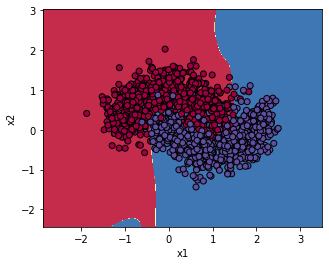

In [41]:
plot_decision_boundary(lambda x: nn.predict(x), X, Y)

How about overfitting?

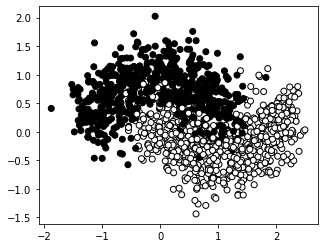

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train[:,0], 
           edgecolors='k');


Create overfitted model!

In [48]:
nn_ovr = NeuralNetwork(hidden_layer_sizes=[10, 20, 30]).fit(X_train, Y_train, 10000, l2_lambda=0, learning_rate=2)

Cost after iteration 0: 0.764797
Cost after iteration 1000: 0.198301
Cost after iteration 2000: 0.189329
Cost after iteration 3000: 0.173083
Cost after iteration 4000: 0.159633
Cost after iteration 5000: 0.159427
Cost after iteration 6000: 0.129761
Cost after iteration 7000: 0.127294
Cost after iteration 8000: 0.097845
Cost after iteration 9000: 0.100090


In [49]:
Y_hat_train = nn_ovr.predict(X_train)

print ('Train accuracy overfitted: %d' % float((np.dot(Y_train.T, Y_hat_train) + np.dot(1 - Y_train.T, 1 - Y_hat_train)) / \
                              float(Y_train.size) * 100) + '%')

Train accuracy overfitted: 95%


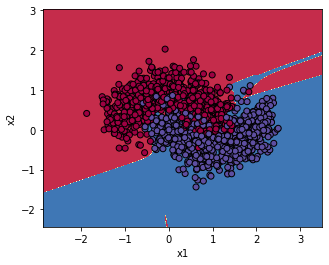

In [50]:
plot_decision_boundary(lambda x: nn_ovr.predict(x), X_train, Y_train)

In [54]:
Y_hat_test = nn_ovr.predict(X_test)
print ('Test accuracy overfitted: %d' % float((np.dot(Y_test.T, Y_hat_test) + np.dot(1 - Y_test.T, 1 - Y_hat_test)) / \
                              float(Y_test.size) * 100) + '%')

Test accuracy overfitted: 87%


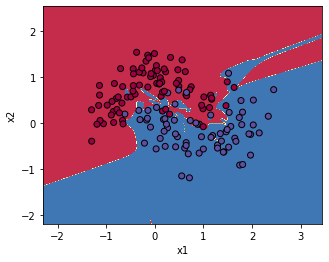

In [55]:
plot_decision_boundary(lambda x: nn_ovr.predict(x), X_test, Y_test)

Regularization!

In [56]:
nn_reg = NeuralNetwork(hidden_layer_sizes=[10, 20, 30]).fit(X_train, Y_train, 10000, l2_lambda=0.5, learning_rate=2)

Cost after iteration 0: 0.777771
Cost after iteration 1000: 0.224456
Cost after iteration 2000: 0.220963
Cost after iteration 3000: 0.219444
Cost after iteration 4000: 0.217741
Cost after iteration 5000: 0.215537
Cost after iteration 6000: 0.213691
Cost after iteration 7000: 0.213045
Cost after iteration 8000: 0.213561
Cost after iteration 9000: 0.213988


In [57]:
Y_hat_train = nn_reg.predict(X_train)

print ('Train accuracy regularized: %d' % float((np.dot(Y_train.T, Y_hat_train) + np.dot(1 - Y_train.T, 1 - Y_hat_train)) / \
                              float(Y_train.size) * 100) + '%')

Train accuracy regularized: 92%


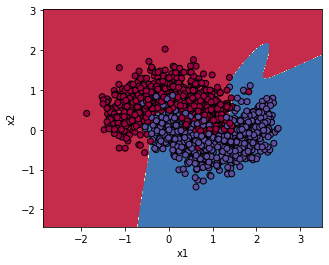

In [58]:
plot_decision_boundary(lambda x: nn_reg.predict(x), X_train, Y_train)

In [59]:
Y_hat_test = nn_reg.predict(X_test)

print ('Test accuracy regularized: %d' % float((np.dot(Y_test.T, Y_hat_test) + np.dot(1 - Y_test.T, 1 - Y_hat_test)) / \
                              float(Y_test.size) * 100) + '%')

Test accuracy regularized: 90%


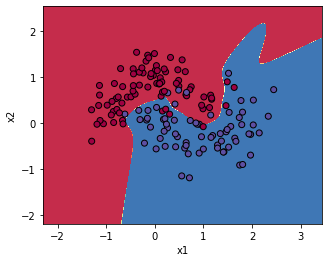

In [60]:
plot_decision_boundary(lambda x: nn_reg.predict(x), X_test, Y_test)

Coded by <b>Yehezk34</b>